### Steps to clean the dataset
1. Check number of columns
2. Correct mispelled column names
3. Check for missing values
4. Check for duplicate vlaues
5. Check for outliers

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pl.Config.set_tbl_rows(10)
pl.Config.set_fmt_str_lengths(30)

polars.config.Config

In [7]:
df = pl.read_csv('../data/diabetes_unclean.csv')
df.head()

ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
i64,i64,str,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,str
502,17975,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
735,34221,"""M""",26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,"""N"""
420,47975,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
680,87656,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
504,34223,"""M""",33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,"""N"""


In [8]:
# Get column names
df.columns

['ID',
 'No_Pation',
 'Gender',
 'AGE',
 'Urea',
 'Cr',
 'HbA1c',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI',
 'CLASS']

In [9]:
# Correct misspelled column names
df = df.rename({'No_Pation': 'Patients_No'})

In [10]:
# Confirm that the column names have been corrected
df.columns

['ID',
 'Patients_No',
 'Gender',
 'AGE',
 'Urea',
 'Cr',
 'HbA1c',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI',
 'CLASS']

In [16]:
# Check for missing values
df.null_count()

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,1,1,2,3,2,2,1,2,1,0,0


In [17]:
# Replace the missing values in HbA1c with mean value.
# First, get the mean value
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [19]:
# Fill in missing records with mean value
df = df.with_columns(pl.col('HbA1c').fill_null(mean_value))

In [20]:
# Confirm that there are no missing values
df.null_count()

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,1,1,2,0,2,2,1,2,1,0,0


In [22]:
# Drop missing values in the oter columns
df = df.drop_nulls()

In [23]:
# Now not column contains missing values.
df.null_count()

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Check values in CLASS column
df['CLASS'].value_counts()

CLASS,counts
str,u32
"""N""",102
"""Y """,9
"""N """,1
"""P""",53
"""Y""",832


In [29]:
# There's an N with space. It should be N.
# Replace N with space with N
# Do the same for Y with space
df = df.with_columns(pl.col('CLASS').str.replace('N ', 'N').str.replace('Y ', 'Y'))

In [32]:
df['CLASS'].value_counts()

# df.unique('Gender') #interesting

CLASS,counts
str,u32
"""Y""",841
"""N""",103
"""P""",53


<Axes: >

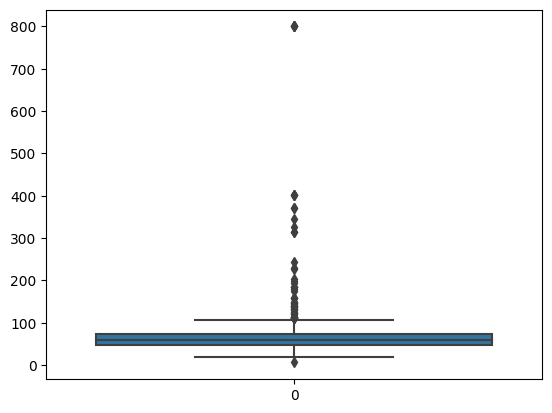

In [35]:
# Outliers are values that are extremely high or low.
# They are usually errors in data collection.
# They can also be extreme values that are not errors.

# Check for outliers in data
sns.boxplot(df['Cr'])

In [37]:
# Choose maximum quantile to fill in outliers
max_quantile = df['Cr'].quantile(0.995)
max_quantile

401.0

In [39]:
# See the rows that are greater than the maximum quantile
df.filter(pl.col('Cr') > max_quantile)

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
i64,i64,str,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,str
1,34325,"""M""",58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,"""Y"""
266,24060,"""M""",58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,"""Y"""
1,34325,"""M""",56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,"""Y"""
19,51623,"""M""",60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,"""Y"""


In [40]:
# It's not many columns. Let's remove them from the dataset
df = df.filter(pl.col('Cr') < max_quantile)

<Axes: >

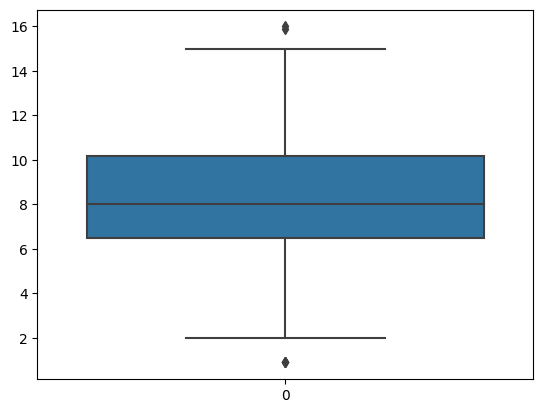

In [41]:
# Check for outliers in HbA1c
sns.boxplot(df['HbA1c'])

In [44]:
# Check for duplicate rows
df.is_duplicated()

""
bool
false
false
false
false
false
…
true
true
false


In [45]:
# Count the number of duplicate rows
df.is_duplicated().sum()

6

In [49]:
df

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
i64,i64,str,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,str
502,17975,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
735,34221,"""M""",26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,"""N"""
420,47975,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
680,87656,"""F""",50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,"""N"""
504,34223,"""M""",33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,"""N"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
188,454316,"""F""",75,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0,"""Y"""
189,454316,"""M""",58,4.0,55,7.9,4.9,2.0,1.2,1.4,1.1,35.0,"""Y"""
192,454316,"""M""",55,4.8,88,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,"""Y"""


In [50]:
# Drop duplicate rows
df = df.unique()
df

ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
i64,i64,str,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,str
634,34224,"""F""",45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,"""N"""
132,34234,"""F""",45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,"""N"""
729,34238,"""F""",49,2.2,28,4.1,5.0,1.3,1.2,3.3,0.6,24.0,"""N"""
742,34239,"""F""",49,3.8,55,4.0,4.4,0.9,1.0,1.3,0.4,23.0,"""N"""
97,12744,"""F""",42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,"""N"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
195,4543,"""f""",55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,"""Y"""
199,454316,"""M""",69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,"""Y"""
200,454317,"""M""",71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,"""Y"""


In [51]:
# Check if duplicates are gone
df.is_duplicated().sum()

0

In [ ]:
# Save the clean data to csv
# df.to_csv('../data/diabetes_clean.csv')